# Lead Score - Case Study
- Abijith Sabu
- Vishnu Suresh
- Yash Lodha

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 : Loading and Cleaning Data

##  1.1  Import Data 

In [3]:
lead = pd.read_csv('Leads.csv')
lead

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


## 1.2 Inspect the dataframe

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
lead.shape

(9240, 37)

In [7]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.3 Cleaning the dataframe

In [8]:
# Converting all the values to lower case
lead = lead.applymap(lambda s:s.lower() if type(s) == str else s)

In [9]:
# Replacing 'Select' with NaN 
lead = lead.replace('select',np.nan)

In [10]:
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
# Dropping unique valued columns
lead1= lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [12]:
# Checking the percentage of missing values
round(100*(lead1.isnull().sum()/len(lead1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
# Removing all the columns that are no required and have 35% null values
lead2 = lead1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
lead2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [14]:
# Rechecking the percentage of missing values
round(100*(lead2.isnull().sum()/len(lead2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

- There is a huge value of null variables in 4 columns as seen above.

In [15]:
lead2['Specialization'] = lead2['Specialization'].fillna('not provided') 
lead2['What matters most to you in choosing a course'] = lead2['What matters most to you in choosing a course'].fillna('not provided')
lead2['Country'] = lead2['Country'].fillna('not provided')
lead2['What is your current occupation'] = lead2['What is your current occupation'].fillna('not provided')
lead2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [16]:
# Rechecking the percentage of missing values
round(100*(lead2.isnull().sum()/len(lead2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [17]:
lead2["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [18]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

lead2['Country'] = lead2.apply(lambda x:slots(x['Country']), axis = 1)
lead2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [19]:
# Rechecking the percentage of missing values
round(100*(lead2.isnull().sum()/len(lead2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [20]:
# Checking the percent of lose if the null values are removed
round(100*(sum(lead2.isnull().sum(axis=1) > 1)/lead2.shape[0]),2)

1.48

In [22]:
lead3 = lead2[lead2.isnull().sum(axis=1) <1]

In [23]:
round(100*(lead3.shape[0])/(lead.shape[0]),2)

98.2

In [24]:
round(100*(lead3.isnull().sum()/len(lead3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [25]:
# To familiarize all the categorical values
for column in lead3:
    print(lead3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      12

In [26]:
# Removing Id values since they are unique for everyone
lead_final = lead3.drop('Prospect ID',1)
lead_final.shape

(9074, 21)

## 2. Exploratory data analysis (EDA)

### 2.1. Univariate Analysis

#### 2.1.1. Categorical Variables

In [27]:
lead_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

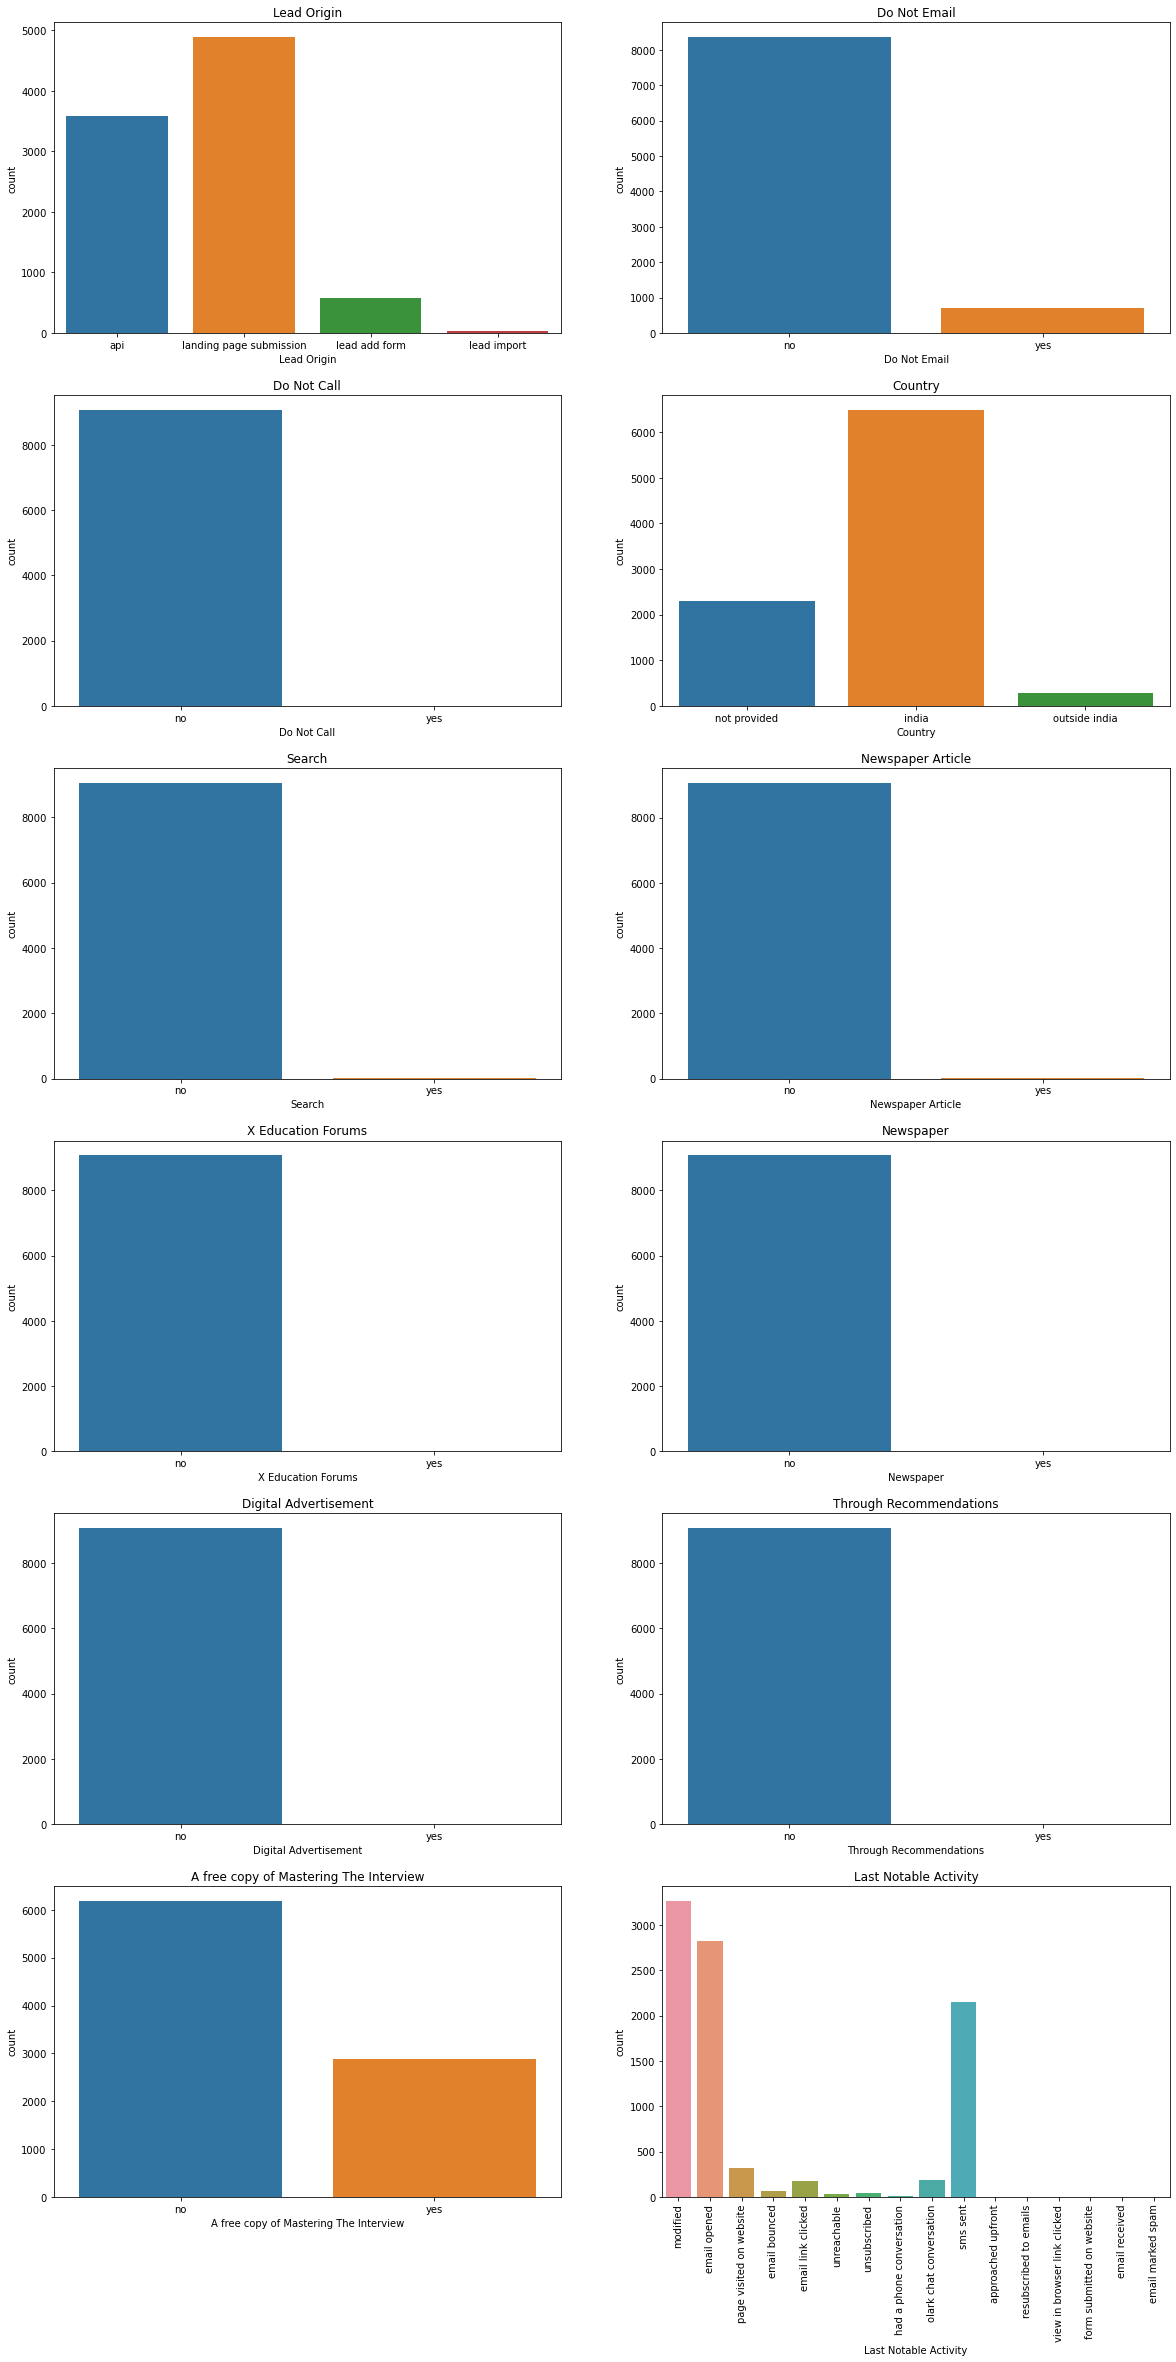

In [30]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(lead_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(lead_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(lead_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(lead_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(lead_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(lead_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(lead_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(lead_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(lead_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(lead_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

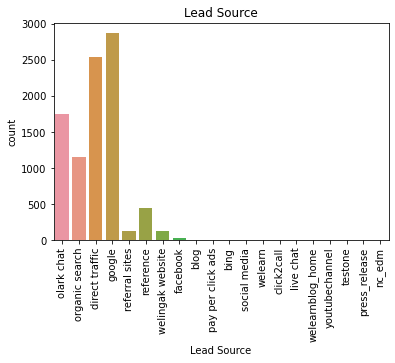

In [31]:
sns.countplot(lead_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

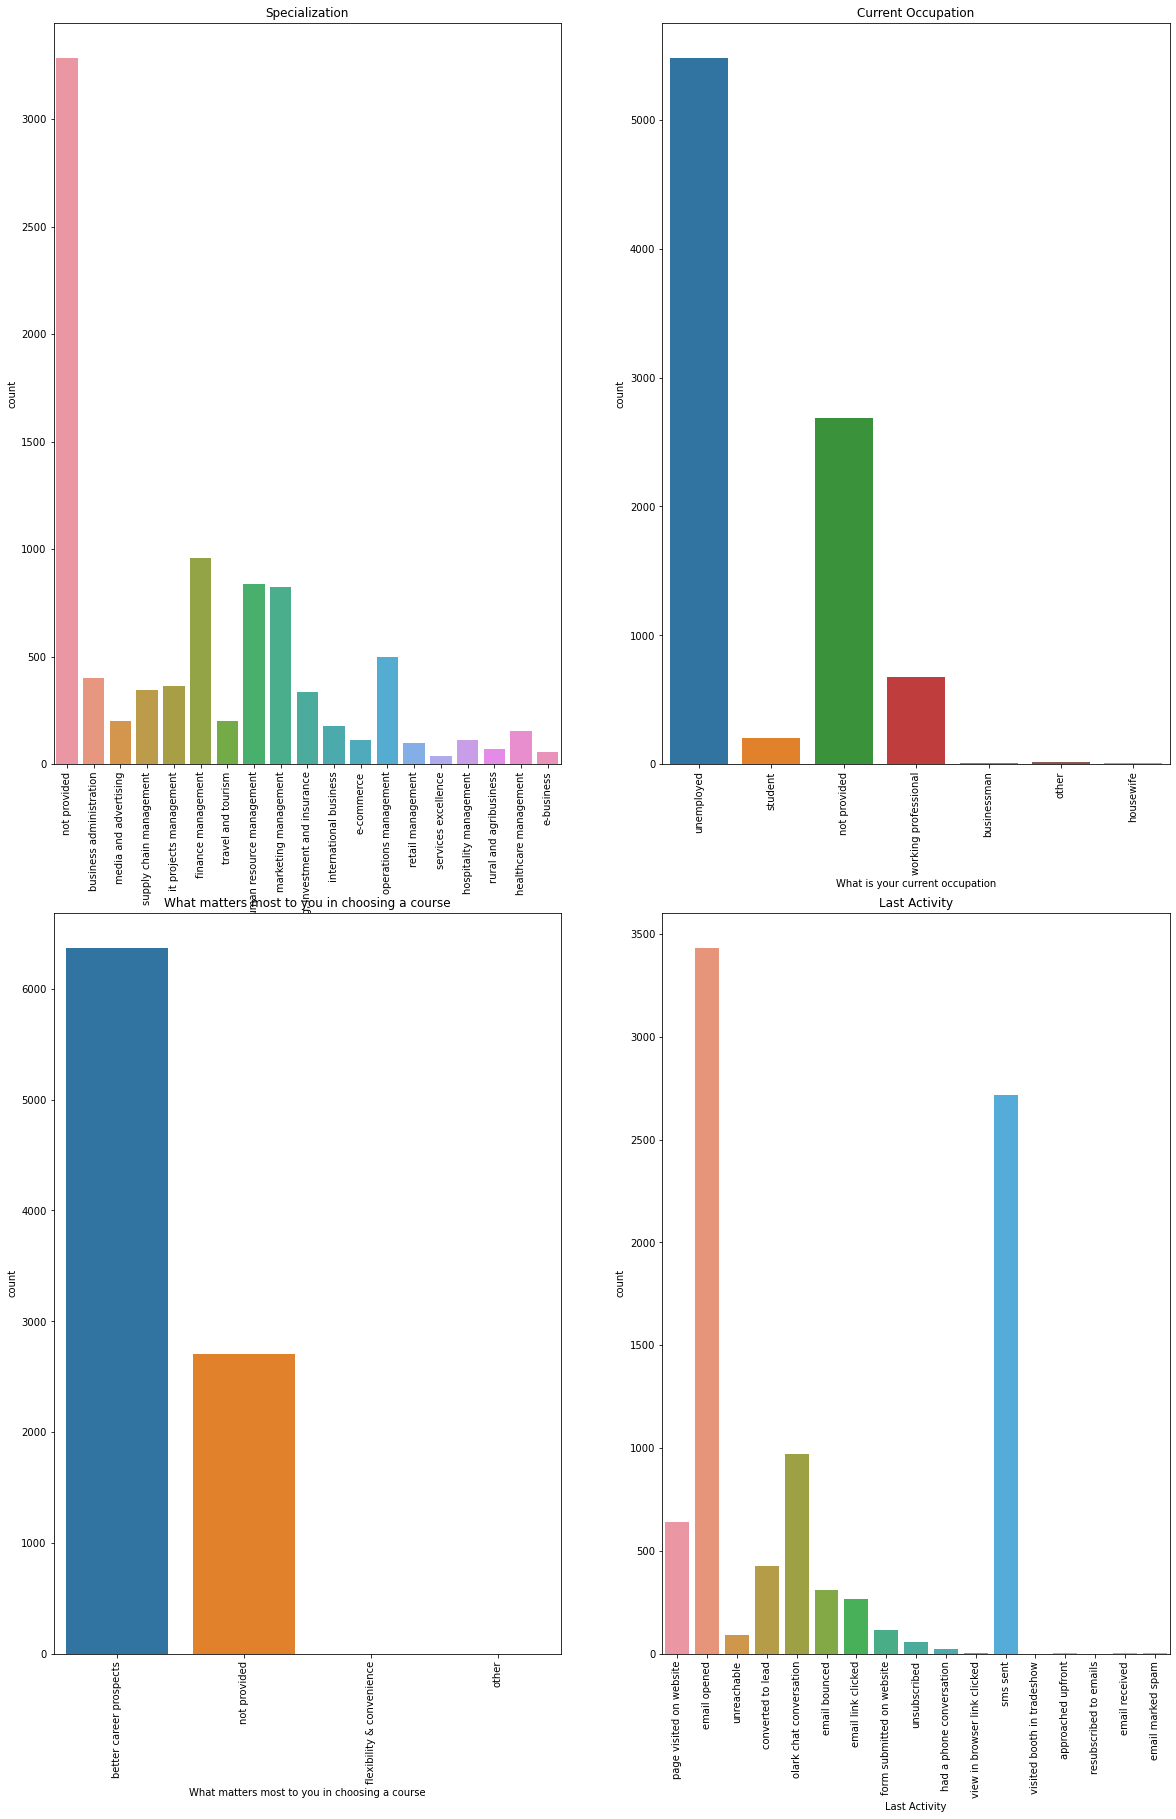

In [32]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(lead_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(lead_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(lead_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(lead_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

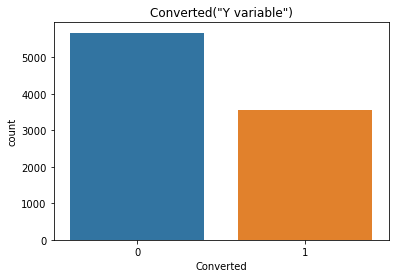

In [33]:
sns.countplot(lead['Converted'])
plt.title('Converted("Y variable")')
plt.show()

#### 2.1.1. Numerical Variables

In [34]:
lead_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

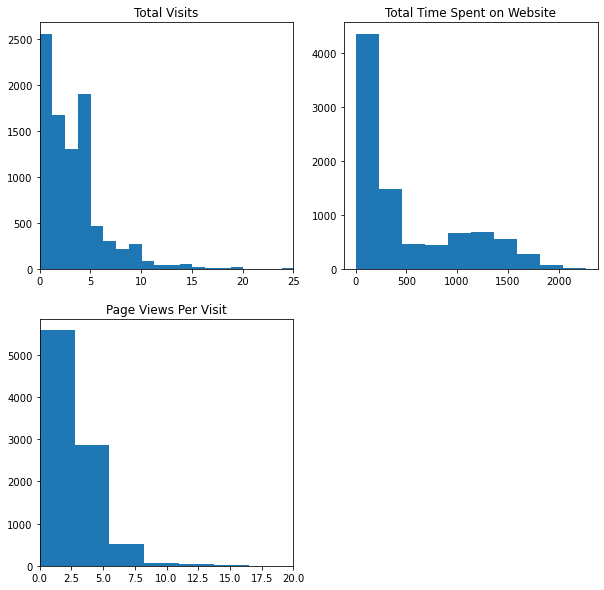

In [35]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### 2.1. Relating all the categorical variables to Converted

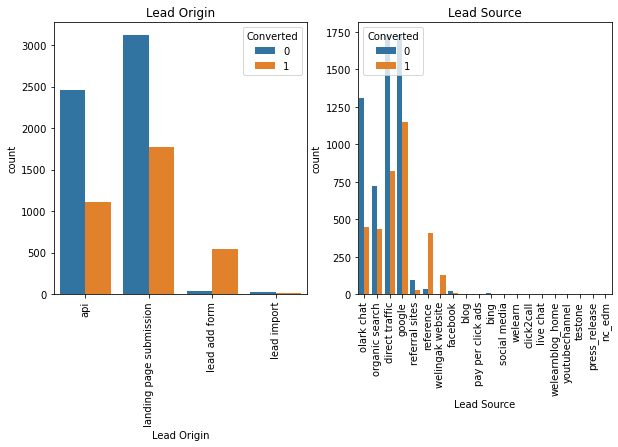

In [37]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

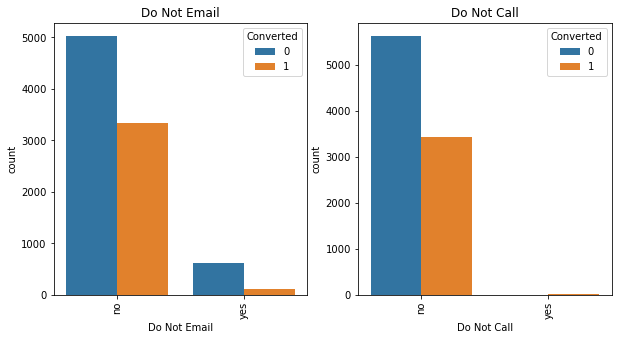

In [38]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

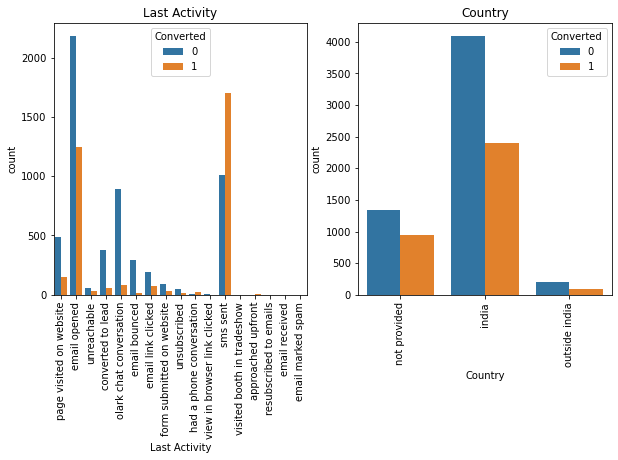

In [39]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

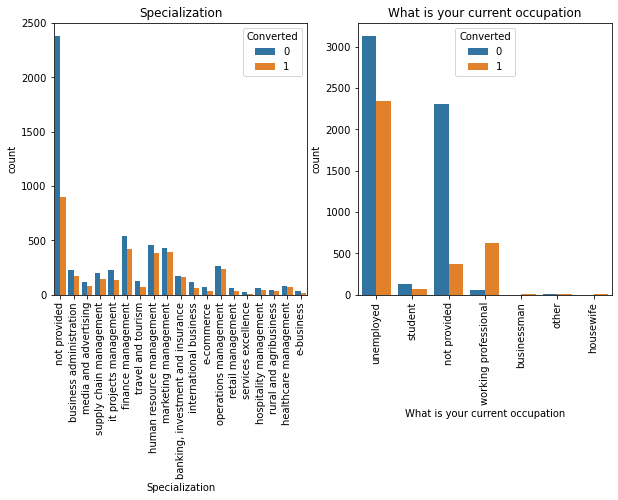

In [40]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

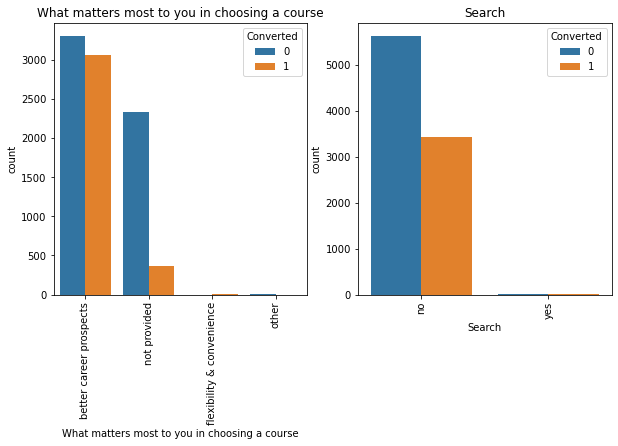

In [41]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

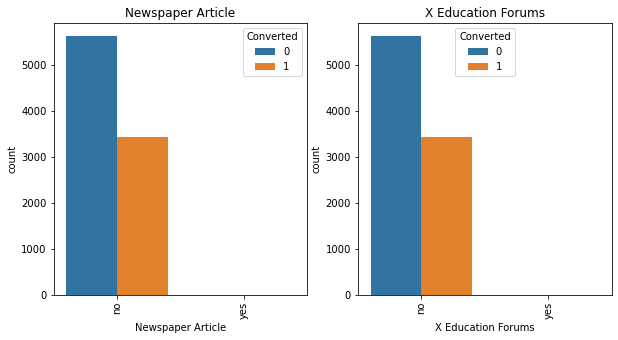

In [42]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

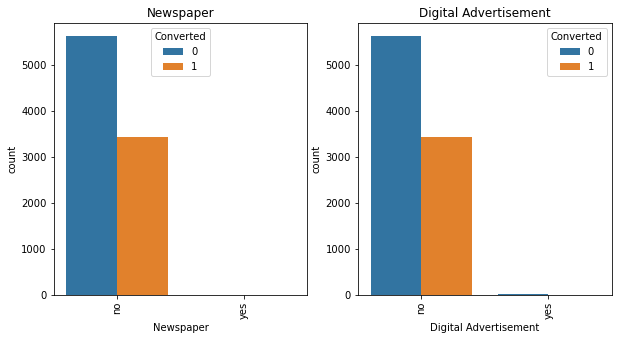

In [43]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

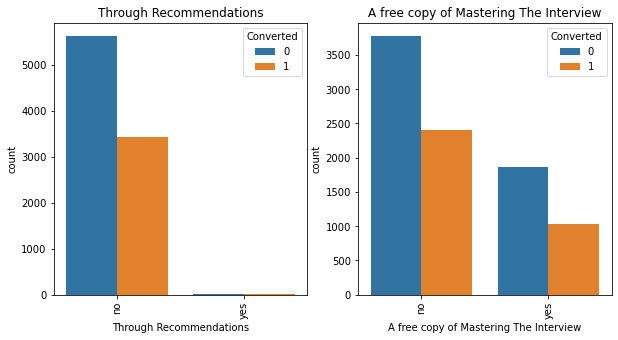

In [44]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

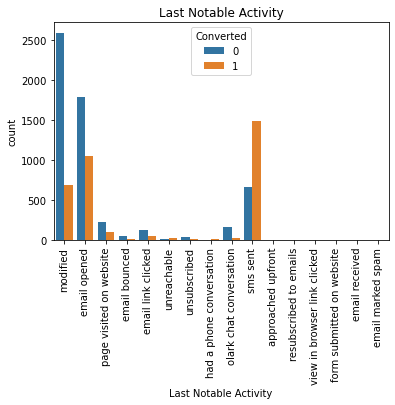

In [45]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

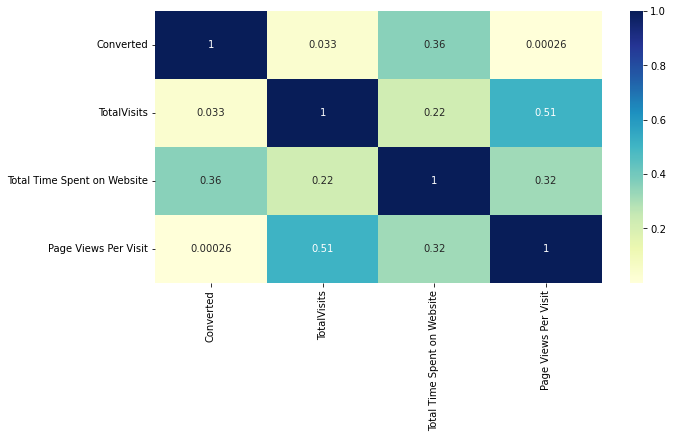

In [47]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(lead_final.corr(), cmap='YlGnBu', annot = True )
plt.show()

In [48]:
numeric = lead_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


- There are no major outliers, so moving on to analysis

## 3. Dummy Variables

In [49]:
lead_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [50]:
lead_final.loc[:, lead_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [51]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(lead_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
lead_final_dum = pd.concat([lead_final, dummy], axis=1)
lead_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [52]:
lead_final_dum = lead_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
lead_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 4. Test-Train Split

In [53]:
# Import the required library
from sklearn.model_selection import train_test_split

In [54]:
X = lead_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [55]:
# Putting the target variable in y
y = lead_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [56]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [57]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


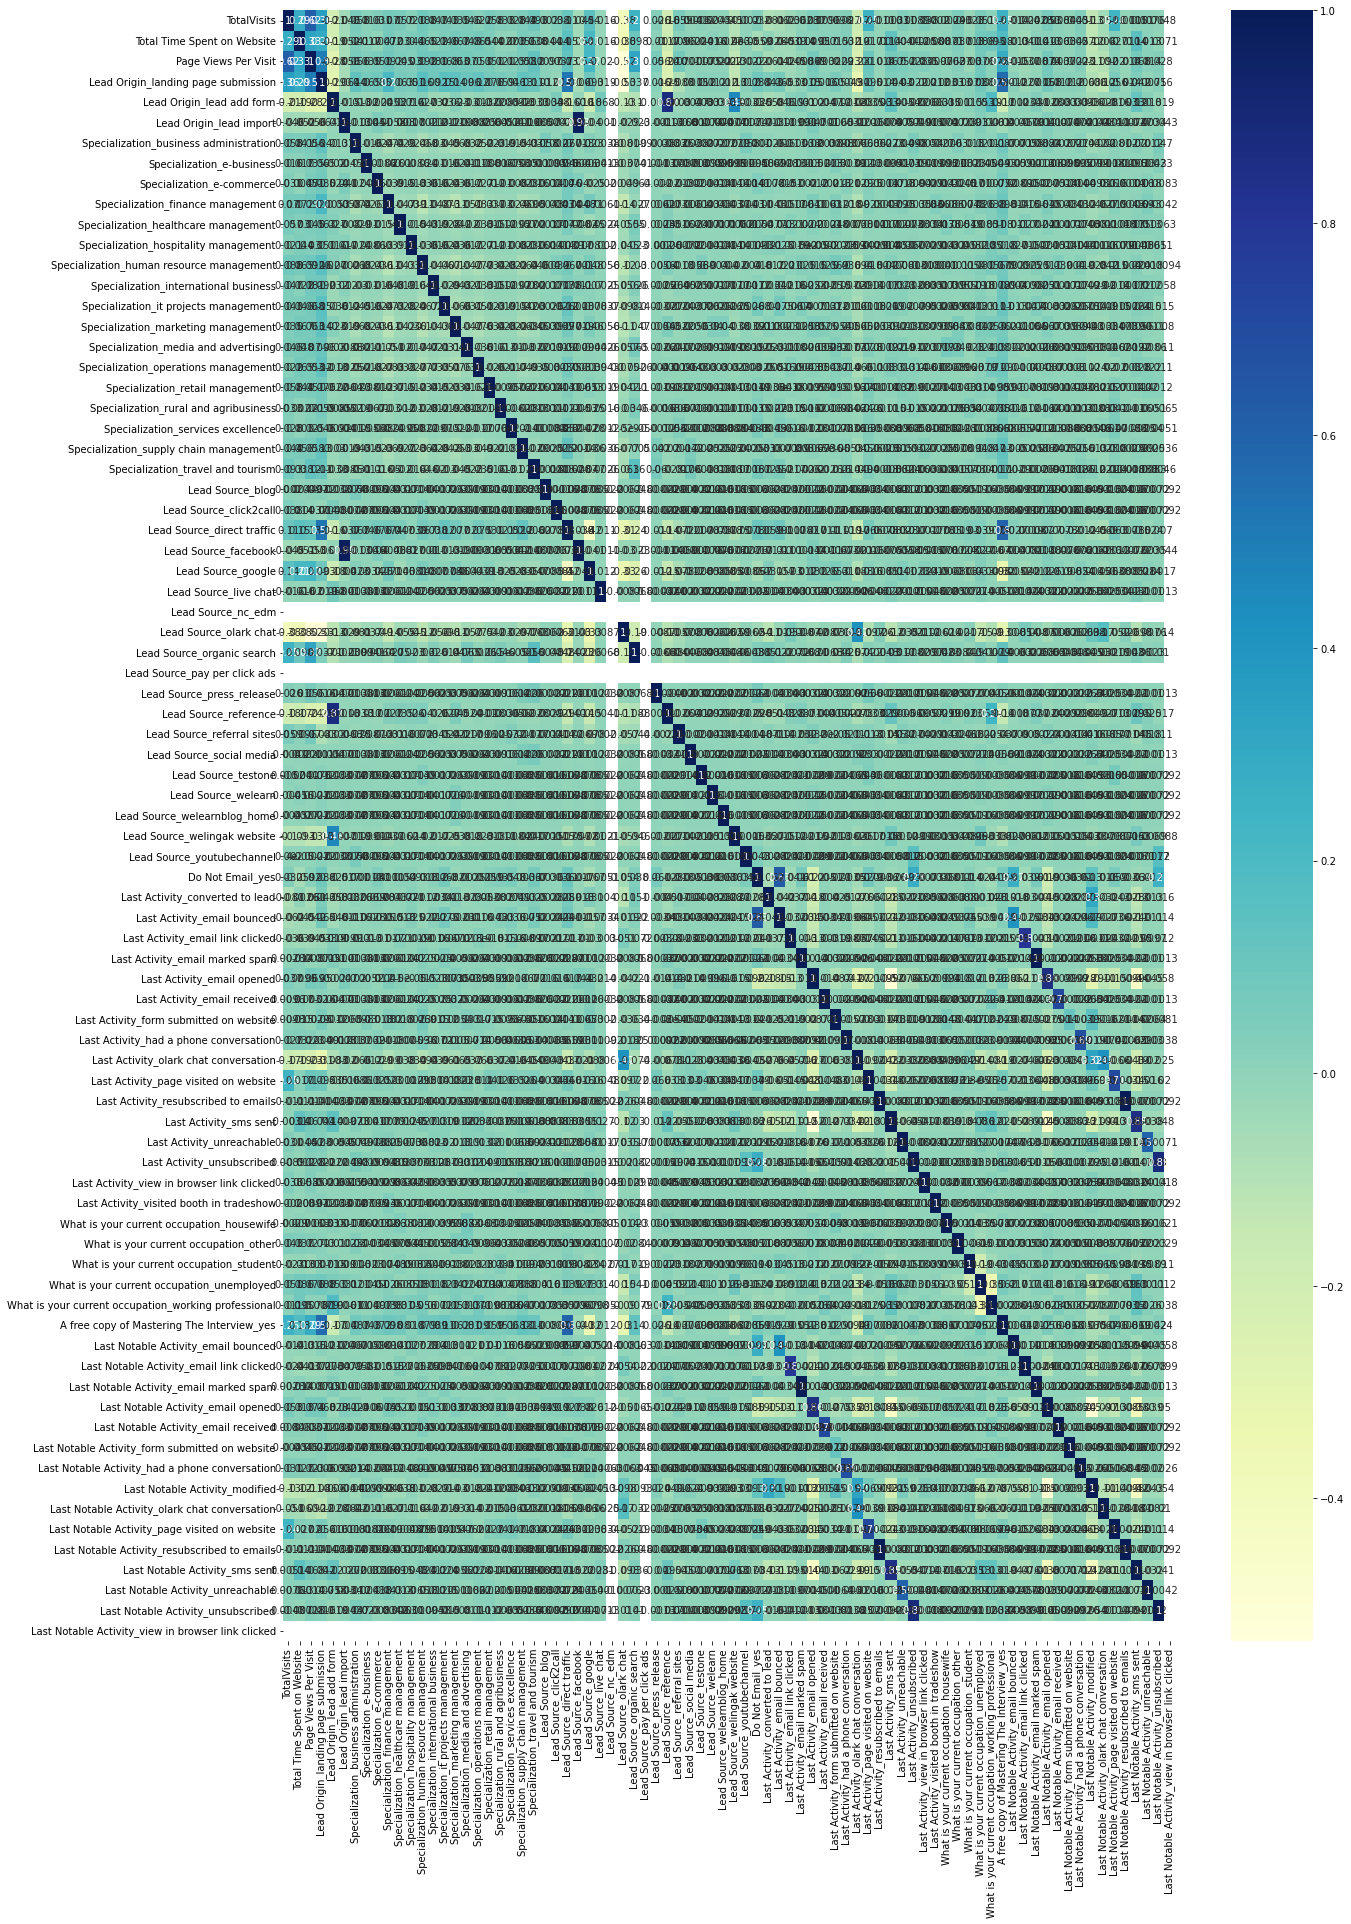

In [59]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr(), cmap='YlGnBu', annot = True )
plt.show()

- There are a lot of variables it is difficult to drop variable. We'll do it after RFE

## 5. Model Building 

In [62]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [63]:
# Import RFE
from sklearn.feature_selection import RFE

In [64]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [65]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

NameError: name 'rfe' is not defined

In [66]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

NameError: name 'rfe' is not defined

- All the variables selected by RFE, next statistics part (p-values and the VIFs).

In [67]:
# Selecting columns selected by RFE
X_train = X_train[col]

NameError: name 'col' is not defined

In [68]:
# Importing statsmodels
import statsmodels.api as sm

In [69]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           74
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 25 Feb 2023   Deviance:                   1.2950e+05
Time:                        11:39:49   Pearson chi2:                 6.33e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 6.036e+14   5.61e+07   1.08e+07      0.000    6.04e+14    6.04e+14
TotalVisits                                           5.285e+15   4.19e+07   1.26e+08      0.000    5.28e+15    5.28e+15
Total Time Spent on Website                           3.025e+14   4.08e+06   7.42e+07      0.000    3.02e+14    3.02e+14
Page Views Per Visit                                 -1.229e+15    1.5e+07  -8.18e+07      0.000   -1.23e+15   -1.23e+15
Lead Origin_landing page submission                  -2.688e+14    3.2e+06   -8.4e+07      0.000   -2.69e+14   -2.69e+14
Lead Origin_lead add form                             1.026e+14   4.76e+07   2.15e+06      0.000    1.03e+14    1.03e+14
Lead Origin_lead import                               5.323e+15    6.9e+07   7.71e+07      0.000    5.32e+15    5.32e+15
Specialization_business administration                2.981e+14   4.76e+06   6.26e+07      0.000    2.98e+14    2.98e+14
Specialization_e-business                             4.371e+14   1.15e+07   3.79e+07      0.000    4.37e+14    4.37e+14
Specialization_e-commerce                             5.102e+14   7.94e+06   6.43e+07      0.000     5.1e+14     5.1e+14
Specialization_finance management                     3.505e+14   3.62e+06   9.67e+07      0.000     3.5e+14     3.5e+14
Specialization_healthcare management                  3.139e+14   6.79e+06   4.62e+07      0.000    3.14e+14    3.14e+14
Specialization_hospitality management                 -1.98e+14   7.87e+06  -2.51e+07      0.000   -1.98e+14   -1.98e+14
Specialization_human resource management              2.406e+14   3.72e+06   6.46e+07      0.000    2.41e+14    2.41e+14
Specialization_international business                 3.908e+14   6.68e+06   5.85e+07      0.000    3.91e+14    3.91e+14
Specialization_it projects management                 4.258e+14   4.86e+06   8.76e+07      0.000    4.26e+14    4.26e+14
Specialization_marketing management                   3.904e+14   3.69e+06   1.06e+08      0.000     3.9e+14     3.9e+14
Specialization_media and advertising                  1.283e+14   6.31e+06   2.03e+07      0.000    1.28e+14    1.28e+14
Specialization_operations management                  4.691e+14   4.35e+06   1.08e+08      0.000    4.69e+14    4.69e+14
Specialization_retail management                      7.408e+13    8.3e+06   8.92e+06      0.000    7.41e+13    7.41e+13
Specialization_rural and agribusiness                 5.283e+14   9.96e+06    5.3e+07      0.000    5.28e+14    5.28e+14
Specialization_services excellence                    1.251e+14   1.24e+07   1.01e+07      0.000    1.25e+14    1.25e+14
Specialization_supply chain management                3.17

In [70]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
53,Last Activity_resubscribed to emails,inf
75,Last Notable Activity_resubscribed to emails,inf
46,Last Activity_email marked spam,inf
67,Last Notable Activity_email marked spam,inf
72,Last Notable Activity_modified,1879.75
...,...,...
60,What is your current occupation_other,1.02
59,What is your current occupation_housewife,1.02
29,Lead Source_nc_edm,NaN
32,Lead Source_pay per click ads,NaN


- The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation'

In [72]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [73]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           74
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2526.3
Date:                Sat, 25 Feb 2023   Deviance:                       5052.6
Time:                        11:41:10   Pearson chi2:                 6.47e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4166
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   24.3208    1.2e+05      0.000      1.000   -2.35e+05    2.35e+05
TotalVisits                                              8.9138      2.029      4.393      0.000       4.937      12.891
Total Time Spent on Website                              4.6448      0.173     26.850      0.000       4.306       4.984
Page Views Per Visit                                    -2.3201      0.631     -3.678      0.000      -3.556      -1.084
Lead Origin_landing page submission                     -0.5091      0.132     -3.857      0.000      -0.768      -0.250
Lead Origin_lead add form                               -0.8221      1.535     -0.536      0.592      -3.831       2.187
Lead Origin_lead import                                 25.1060   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Specialization_business administration                   0.4877      0.195      2.498      0.012       0.105       0.870
Specialization_e-business                                0.6207      0.457      1.357      0.175      -0.276       1.517
Specialization_e-commerce                                0.8042      0.327      2.461      0.014       0.164       1.445
Specialization_finance management                        0.5428      0.148      3.657      0.000       0.252       0.834
Specialization_healthcare management                     0.6083      0.282      2.157      0.031       0.056       1.161
Specialization_hospitality management                   -0.2364      0.330     -0.717      0.474      -0.883       0.410
Specialization_human resource management                 0.5082      0.153      3.332      0.001       0.209       0.807
Specialization_international business                    0.4222      0.269      1.571      0.116      -0.105       0.949
Specialization_it projects management                    0.5996      0.205      2.923      0.003       0.198       1.002
Specialization_marketing management                      0.7212      0.150      4.808      0.000       0.427       1.015
Specialization_media and advertising                     0.2777      0.257      1.082      0.279      -0.225       0.781
Specialization_operations management                     0.6154      0.180      3.411      0.001       0.262       0.969
Specialization_retail management                         0.0376      0.350      0.107      0.914      -0.649       0.724
Specialization_rural and agribusiness                    0.7415      0.426      1.739      0.082      -0.094       1.577
Specialization_services excellence                       0.9103      0.559      1.629      0.103      -0.185       2.006
Specialization_supply chain management                   0

In [74]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
53,Last Activity_resubscribed to emails,inf
67,Last Notable Activity_email marked spam,inf
74,Last Notable Activity_resubscribed to emails,inf
46,Last Activity_email marked spam,inf
47,Last Activity_email opened,565.29
...,...,...
60,What is your current occupation_other,1.02
59,What is your current occupation_housewife,1.02
29,Lead Source_nc_edm,NaN
32,Lead Source_pay per click ads,NaN


- The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation housewife'

In [75]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [76]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           73
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.2
Date:                Sat, 25 Feb 2023   Deviance:                       5068.3
Time:                        11:41:30   Pearson chi2:                 6.47e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4152
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.3602   7.27e+04      0.000      1.000   -1.42e+05    1.42e+05
TotalVisits                                              8.8302      2.025      4.360      0.000       4.861      12.800
Total Time Spent on Website                              4.6367      0.173     26.855      0.000       4.298       4.975
Page Views Per Visit                                    -2.3596      0.630     -3.744      0.000      -3.595      -1.124
Lead Origin_landing page submission                     -0.5076      0.132     -3.855      0.000      -0.766      -0.249
Lead Origin_lead add form                               -0.8107      1.532     -0.529      0.597      -3.814       2.193
Lead Origin_lead import                                 24.0916   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Specialization_business administration                   0.4900      0.195      2.513      0.012       0.108       0.872
Specialization_e-business                                0.6175      0.457      1.352      0.176      -0.277       1.512
Specialization_e-commerce                                0.8074      0.326      2.474      0.013       0.168       1.447
Specialization_finance management                        0.5478      0.148      3.700      0.000       0.258       0.838
Specialization_healthcare management                     0.6611      0.280      2.359      0.018       0.112       1.210
Specialization_hospitality management                   -0.2332      0.330     -0.708      0.479      -0.879       0.413
Specialization_human resource management                 0.5210      0.152      3.422      0.001       0.223       0.819
Specialization_international business                    0.4244      0.269      1.580      0.114      -0.102       0.951
Specialization_it projects management                    0.6011      0.205      2.934      0.003       0.200       1.003
Specialization_marketing management                      0.7245      0.150      4.836      0.000       0.431       1.018
Specialization_media and advertising                     0.3464      0.253      1.368      0.171      -0.150       0.843
Specialization_operations management                     0.6170      0.180      3.424      0.001       0.264       0.970
Specialization_retail management                         0.0384      0.350      0.110      0.913      -0.647       0.724
Specialization_rural and agribusiness                    0.7387      0.426      1.734      0.083      -0.096       1.573
Specialization_services excellence                       0.9127      0.558      1.636      0.102      -0.181       2.006
Specialization_supply chain management                   0

In [77]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
53,Last Activity_resubscribed to emails,inf
73,Last Notable Activity_resubscribed to emails,inf
46,Last Activity_email marked spam,inf
66,Last Notable Activity_email marked spam,inf
47,Last Activity_email opened,565.29
...,...,...
7,Specialization_e-business,1.06
59,What is your current occupation_other,1.02
29,Lead Source_nc_edm,NaN
32,Lead Source_pay per click ads,NaN


- The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation other'

In [78]:
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

In [79]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           72
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2537.8
Date:                Sat, 25 Feb 2023   Deviance:                       5075.7
Time:                        11:41:44   Pearson chi2:                 6.52e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4145
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.3751   7.27e+04      0.000      1.000   -1.43e+05    1.43e+05
TotalVisits                                              9.1304      2.025      4.508      0.000       5.161      13.100
Total Time Spent on Website                              4.6458      0.173     26.914      0.000       4.307       4.984
Page Views Per Visit                                    -2.3689      0.630     -3.762      0.000      -3.603      -1.135
Lead Origin_landing page submission                     -0.5179      0.131     -3.939      0.000      -0.776      -0.260
Lead Origin_lead add form                               -0.8316      1.532     -0.543      0.587      -3.835       2.172
Lead Origin_lead import                                 24.0811   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Specialization_business administration                   0.5191      0.194      2.674      0.007       0.139       0.900
Specialization_e-business                                0.6231      0.457      1.364      0.173      -0.272       1.519
Specialization_e-commerce                                0.8143      0.326      2.496      0.013       0.175       1.454
Specialization_finance management                        0.5609      0.148      3.792      0.000       0.271       0.851
Specialization_healthcare management                     0.6668      0.280      2.380      0.017       0.118       1.216
Specialization_hospitality management                   -0.2251      0.329     -0.683      0.494      -0.871       0.421
Specialization_human resource management                 0.5314      0.152      3.492      0.000       0.233       0.830
Specialization_international business                    0.4336      0.268      1.615      0.106      -0.093       0.960
Specialization_it projects management                    0.6102      0.205      2.980      0.003       0.209       1.012
Specialization_marketing management                      0.7534      0.150      5.039      0.000       0.460       1.046
Specialization_media and advertising                     0.3947      0.251      1.574      0.115      -0.097       0.886
Specialization_operations management                     0.6254      0.180      3.472      0.001       0.272       0.978
Specialization_retail management                         0.0468      0.350      0.134      0.893      -0.638       0.732
Specialization_rural and agribusiness                    0.7457      0.426      1.750      0.080      -0.089       1.581
Specialization_services excellence                       0.9211      0.557      1.653      0.098      -0.171       2.013
Specialization_supply chain management                   0

In [80]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
53,Last Activity_resubscribed to emails,inf
72,Last Notable Activity_resubscribed to emails,inf
46,Last Activity_email marked spam,inf
65,Last Notable Activity_email marked spam,inf
47,Last Activity_email opened,565.28
...,...,...
20,Specialization_services excellence,1.06
7,Specialization_e-business,1.06
29,Lead Source_nc_edm,NaN
32,Lead Source_pay per click ads,NaN


- All the VIF values are good and all the p-values are below 0.05. So we can fix model.

## 6. Creating Prediction

In [81]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.732503
3604    0.088218
5584    0.311680
7679    0.094828
7563    0.154837
7978    0.917870
7780    0.202226
7863    0.985156
838     0.622134
708     0.250629
dtype: float64

In [82]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73250253, 0.08821785, 0.31168049, 0.09482765, 0.15483726,
       0.91787026, 0.20222621, 0.98515599, 0.62213354, 0.25062917])

In [83]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.732503
1,0,0.088218
2,0,0.311680
3,0,0.094828
4,0,0.154837


In [84]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.732503,1
1,0,0.088218,0
2,0,0.311680,0
3,0,0.094828,0
4,0,0.154837,0


## 7. Model Evaluation

In [85]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [86]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3456,  439],
       [ 695, 1761]])

In [87]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [88]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8214454416627303

- That's around 81% accuracy with is a very good value

In [89]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [90]:
# Calculating the sensitivity
TP/(TP+FN)

0.7170195439739414

In [91]:
# Calculating the specificity
TN/(TN+FP)

0.8872913992297817

- with the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 87%.

## 7. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [92]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [93]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

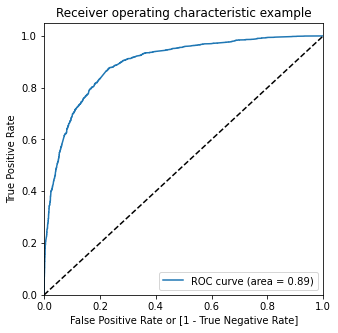

In [94]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

- The area under ROC curve is 0.87 which is a very good value.

In [95]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.732503,1,1,1,1,1,1,1,1,1,0,0
1,0,0.088218,0,1,0,0,0,0,0,0,0,0,0
2,0,0.311680,0,1,1,1,1,0,0,0,0,0,0
3,0,0.094828,0,1,0,0,0,0,0,0,0,0,0
4,0,0.154837,0,1,1,0,0,0,0,0,0,0,0


In [96]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.640529,0.967834,0.434146
0.2,0.2,0.767911,0.921010,0.671374
0.3,0.3,0.808534,0.877443,0.765083
0.4,0.4,0.820028,0.792752,0.837227
0.5,0.5,0.821445,0.717020,0.887291
0.6,0.6,0.811211,0.644137,0.916560
0.7,0.7,0.786648,0.531352,0.947625
0.8,0.8,0.758306,0.424267,0.968935
0.9,0.9,0.715950,0.288681,0.985366


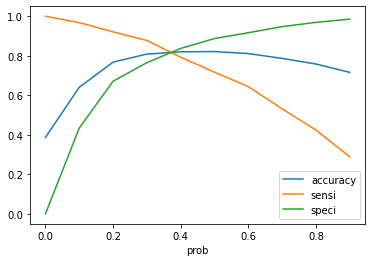

In [97]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the graph it is visible that the optimal cut off is at 0.35.

In [98]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.732503,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.088218,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.311680,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.094828,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.154837,0,1,1,0,0,0,0,0,0,0,0,0


In [99]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8143599433160132

In [100]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3147,  748],
       [ 431, 2025]])

In [101]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [102]:
# Calculating the sensitivity
TP/(TP+FN)

0.8245114006514658

In [103]:
# Calculating the specificity
TN/(TN+FP)

0.8079589216944801

- The current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.

## 8. Prediction on Test set

In [104]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [105]:
# Substituting all the columns in the final train model
col = X_train.columns

In [106]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
8308,1.0,0.035461,0.416813,0.208333,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7212,1.0,0.028369,0.001320,0.166667,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2085,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4048,1.0,0.028369,0.617077,0.083333,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4790,1.0,0.028369,0.005282,0.083333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8179,1.0,0.170213,0.148768,0.333333,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6236,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5240,1.0,0.078014,0.458627,0.229167,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [107]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.241032
1,1,0.842654
2,1,0.985156
3,1,0.886723
4,0,0.156272


In [108]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.241032,0
1,1,0.842654,1
2,1,0.985156,1
3,1,0.886723,1
4,0,0.156272,0
...,...,...,...
2718,1,0.150158,0
2719,0,0.266695,0
2720,0,0.155270,0
2721,1,0.858522,1


In [109]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8097686375321337

In [110]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1401,  343],
       [ 175,  804]])

In [111]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [112]:
# Calculating the sensitivity
TP/(TP+FN)

0.8212461695607763

In [113]:
# Calculating the specificity
TN/(TN+FP)

0.8033256880733946

- The current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.

## 9. Precision-Recall

In [114]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3456,  439],
       [ 695, 1761]])

In [115]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8004545454545454

In [116]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7170195439739414

- The current cut off as 0.35 we have Precision around 78% and Recall around 70%

### 9.1. Precision and recall tradeoff

In [117]:
from sklearn.metrics import precision_recall_curve

In [118]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [119]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

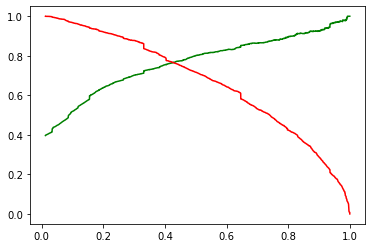

In [120]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [121]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.732503,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.088218,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.311680,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.094828,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.154837,0,1,1,0,0,0,0,0,0,0,0,0


In [122]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8182963312864115

In [123]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3294,  601],
       [ 553, 1903]])

In [124]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [125]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7599840255591054

In [126]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7748371335504886

- The current cut off as 0.41 we have Precision around 74% and Recall around 76%

## 10. Prediction on Test set

In [127]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.241032
1,1,0.842654
2,1,0.985156
3,1,0.886723
4,0,0.156272


In [128]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.241032,0
1,1,0.842654,1
2,1,0.985156,1
3,1,0.886723,1
4,0,0.156272,0
...,...,...,...
2718,1,0.150158,0
2719,0,0.266695,0
2720,0,0.155270,0
2721,1,0.858522,1


In [129]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8185824458318032

In [130]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1471,  273],
       [ 221,  758]])

In [131]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [132]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7352085354025218

In [133]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7742594484167518

- The current cut off as 0.41 we have Precision around 73% and Recall around 75%

## Conclusion
The most in the potential buyers are  :
1.	The total time spend on the Website.
2.	Total number of visits.
3.	When the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>
d.	Welingak website<br>
4.	When the last activity was:<br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	When the lead origin is Lead add format.
6.	When their current occupation is as a working professional.<br>